## Example Jupyter Notebook for Image Processing

Start by loading necessary packages

In [2]:
import os
import re, sys, time, cv2, errno
import numpy as np
import mahotas as mh
from skimage import measure
from scipy.ndimage.filters import maximum_filter
from scipy.ndimage.morphology import binary_erosion
import pandas as pd
import matplotlib.pyplot as plt
from pylab import imshow, gray
from skimage import exposure

Define file locations and other arguments. Make a `temp` output directory (your Desktop is a reasonable place).


In [4]:
al = '../Data/3189018_ch2.tif ../Data/3189017_nuc.tif TRUE 00001 TRUE ~/Desktop/temp A01'.split()
os.path.isfile(al[1])

True

Make sure the image is readable and looks correct

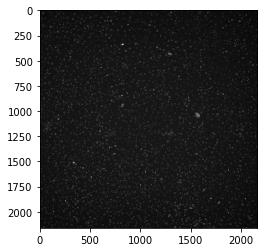

In [5]:
im = cv2.imread(al[1],cv2.IMREAD_ANYDEPTH)
imshow(im,cmap='gray')

In [6]:
os.getcwd()

'C:\\Users\\james\\Documents\\git-repos\\QSBSC_Class_2020\\Python_code'

In [8]:
al[5] = os.path.expanduser(al[5])



os.path.isdir(al[5])

False

In [9]:
al{5}

SyntaxError: invalid syntax (<ipython-input-9-c704c8c27027>, line 1)

In [16]:
impath = '../Data/water_coins.jpg'
os.path.isfile(impath)

True

al{5}

In [10]:
al{5}

SyntaxError: invalid syntax (<ipython-input-10-c704c8c27027>, line 1)

Code below is copied from https://docs.opencv.org/4.1.1/d3/db4/tutorial_py_watershed.html.

In [14]:
al[5]

'C:\\Users\\james/Desktop/temp'

In [17]:
img2 = cv2.imread(impath)

gray = cv2.cvtColor(img2,cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)

# noise removal
kernel = np.ones((3,3),np.uint8)
opening = cv2.morphologyEx(thresh,cv2.MORPH_OPEN,kernel, iterations = 2)
# sure background area
sure_bg = cv2.dilate(opening,kernel,iterations=3)
# Finding sure foreground area
dist_transform = cv2.distanceTransform(opening,cv2.DIST_L2,5)
ret, sure_fg = cv2.threshold(dist_transform,0.7*dist_transform.max(),255,0)
# Finding unknown region
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg,sure_fg)


# Marker labelling
ret, markers = cv2.connectedComponents(sure_fg)
# Add one to all labels so that sure background is not 0, but 1
markers = markers+1
# Now, mark the region of unknown with zero
markers[unknown==255] = 0

markers = cv2.watershed(img2, markers)
img2[markers == -1] = [255,0,0]

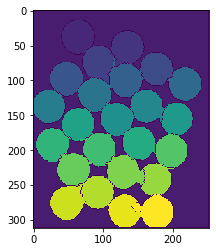

In [23]:
imshow(markers)

In [19]:
img2.shape

(312, 252, 3)

In [22]:
img2

array([[[255,   0,   0],
        [255,   0,   0],
        [255,   0,   0],
        ...,
        [255,   0,   0],
        [255,   0,   0],
        [255,   0,   0]],

       [[255,   0,   0],
        [234, 241, 238],
        [237, 244, 241],
        ...,
        [246, 251, 250],
        [246, 251, 250],
        [255,   0,   0]],

       [[255,   0,   0],
        [234, 241, 238],
        [237, 244, 241],
        ...,
        [246, 251, 250],
        [246, 251, 250],
        [255,   0,   0]],

       ...,

       [[255,   0,   0],
        [224, 233, 230],
        [225, 234, 231],
        ...,
        [242, 247, 245],
        [242, 247, 245],
        [255,   0,   0]],

       [[255,   0,   0],
        [218, 227, 224],
        [220, 229, 226],
        ...,
        [241, 246, 244],
        [241, 246, 244],
        [255,   0,   0]],

       [[255,   0,   0],
        [255,   0,   0],
        [255,   0,   0],
        ...,
        [255,   0,   0],
        [255,   0,   0],
        [255,   0,   0]]